In [45]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [46]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


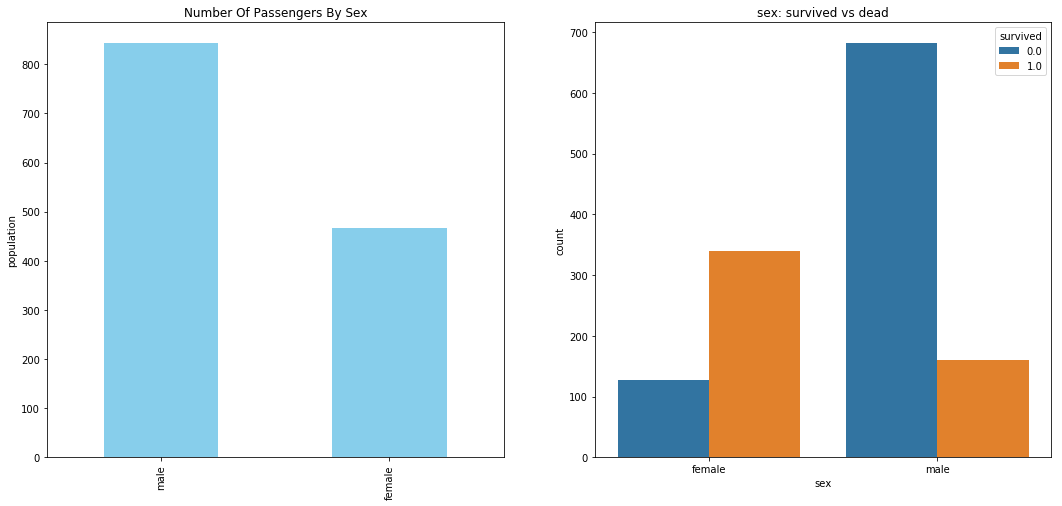

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("population")
sns.countplot("sex", hue = "survived", data = titanic, ax = ax[1])
ax[1].set_title("sex: survived vs dead")
plt.show()

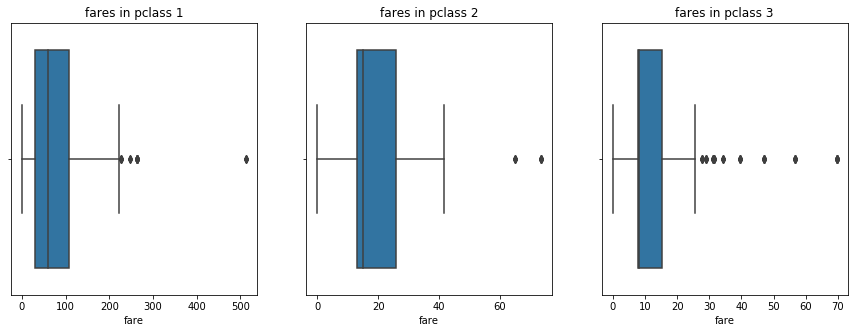

In [49]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(titanic[titanic["pclass"] == 1]["fare"], ax = ax[0])
ax[0].set_title("fares in pclass 1")
sns.boxplot(titanic[titanic["pclass"] == 2]["fare"], ax = ax[1])
ax[1].set_title("fares in pclass 2")
sns.boxplot(titanic[titanic["pclass"] == 3]["fare"], ax = ax[2])
ax[2].set_title("fares in pclass 3")
plt.show()

In [52]:
#Age Group
def ageG2int(data):
    data["Age_group"] = "NaN"
    data.loc[data["age"] <= 16, "age_group"] = 0 # Child
    data.loc[(data["age"] > 16) & (data["age"] <= 32), "age_group"] = 1 # young teen and teen adult
    data.loc[(data["age"] > 32) & (data["age"] <= 48), "age_group"] = 3 # middle age
    data.loc[(data["age"] > 48) & (data["age"] <= 64), "age_group"] = 4 # young elderly
    data.loc[data["age"] > 64, "age_group"] = 5 # elderly
    return data

titanic = ageG2int(titanic)

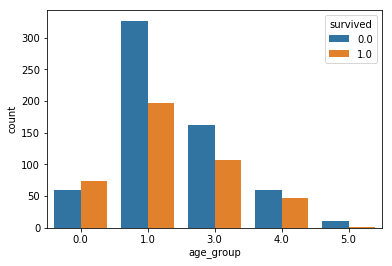

In [54]:
sns.countplot("age_group", hue = "survived", data = titanic)
plt.show()

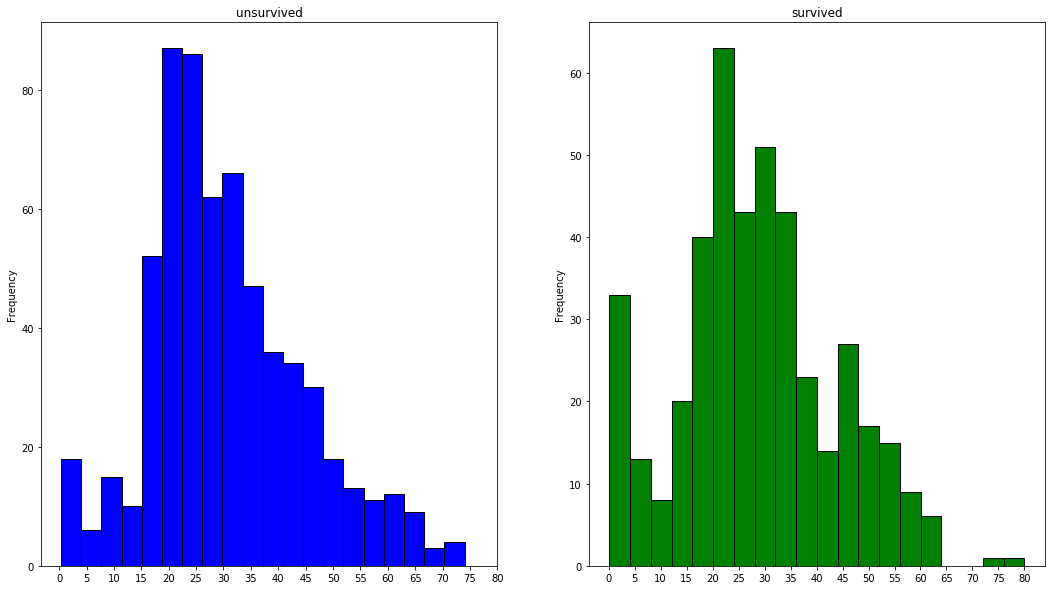

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
titanic[titanic["survived"] == 0]["age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
ax[0].set_title("unsurvived")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)
titanic[titanic["survived"] == 1]["age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("survived")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()